# Clustering des accidents

Ce notebook présente :

- Le chargement des données prétraitées
- La préparation pour clustering avec `features.py'
- L'exécution du clustering
- La visualisation des résultats.

---


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np

import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

from src.features import prepare_clustering_df, kmeans_clustering


### Préparation DataFrame pour clustering

In [2]:
# Chargement données nettoyées
caract = pd.read_csv("../data/processed/caract_clean.csv")

lieux = pd.read_csv("../data/processed/lieux_clean.csv")

vehicules = pd.read_csv("../data/processed/vehicules_clean.csv")

In [3]:
df_cluster = prepare_clustering_df(caract, lieux, vehicules)

print(f"Shape du dataset prêt pour clustering : {df_cluster.shape}")


Shape du dataset prêt pour clustering : (117674, 170)


### Recherche du meilleur nombre de clusters (k)

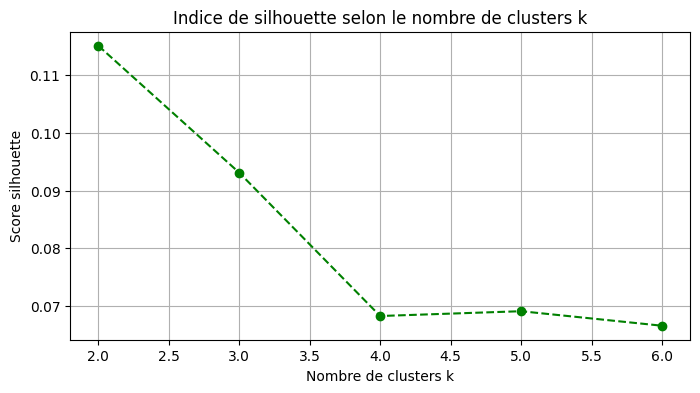

Meilleur nombre de clusters : 2


In [4]:
silhouette_scores = []
K = range(2, 7)
for k in K:
    kmeans = kmeans_clustering(df_cluster.copy(), k, plot=False)
    score = silhouette_score(df_cluster, kmeans['cluster'])
    silhouette_scores.append(score)

plt.figure(figsize=(8,4))
plt.plot(K, silhouette_scores, marker='o', linestyle='--', color='green')
plt.title('Indice de silhouette selon le nombre de clusters k')
plt.xlabel('Nombre de clusters k')
plt.ylabel('Score silhouette')
plt.grid(True)
plt.show()

best_k = K[np.argmax(silhouette_scores)]
print(f"Meilleur nombre de clusters : {best_k}")

### Clustering  et analyse visuelle

#### Selon le "meilleure k"

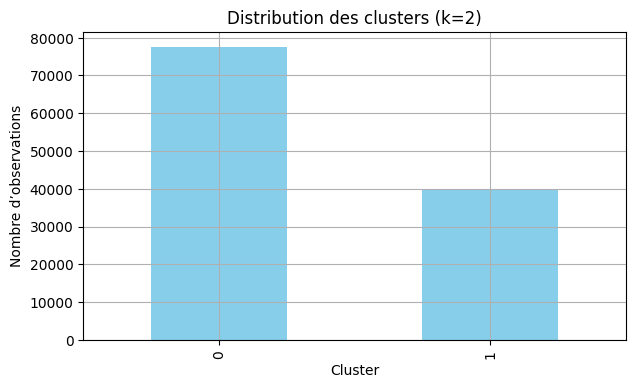

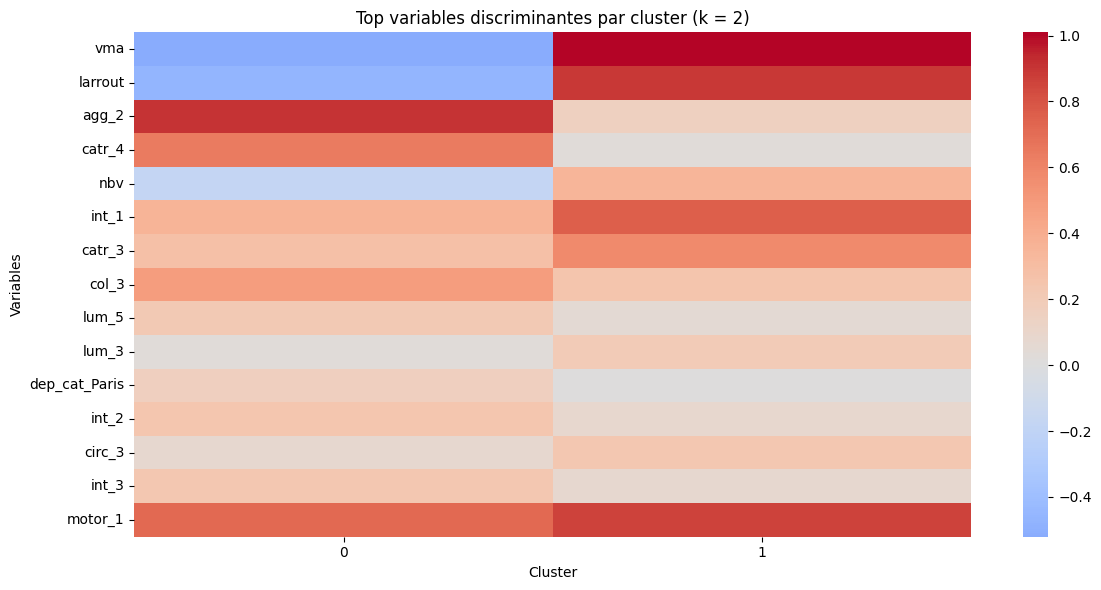

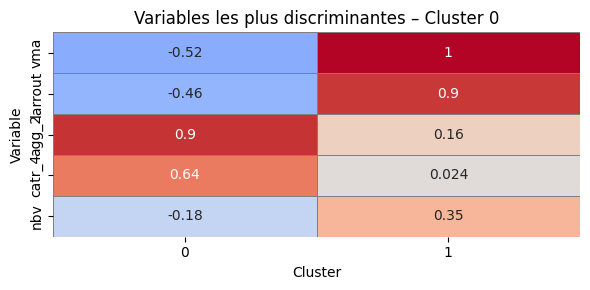

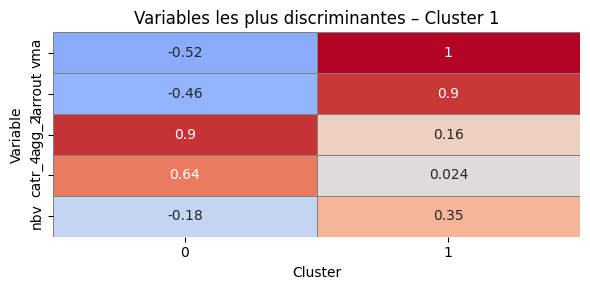

In [5]:
df_cluster = kmeans_clustering(df_cluster, best_k)

#### Selon des k plus grands

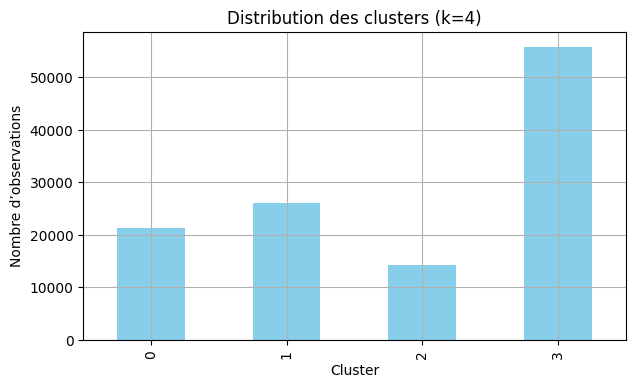

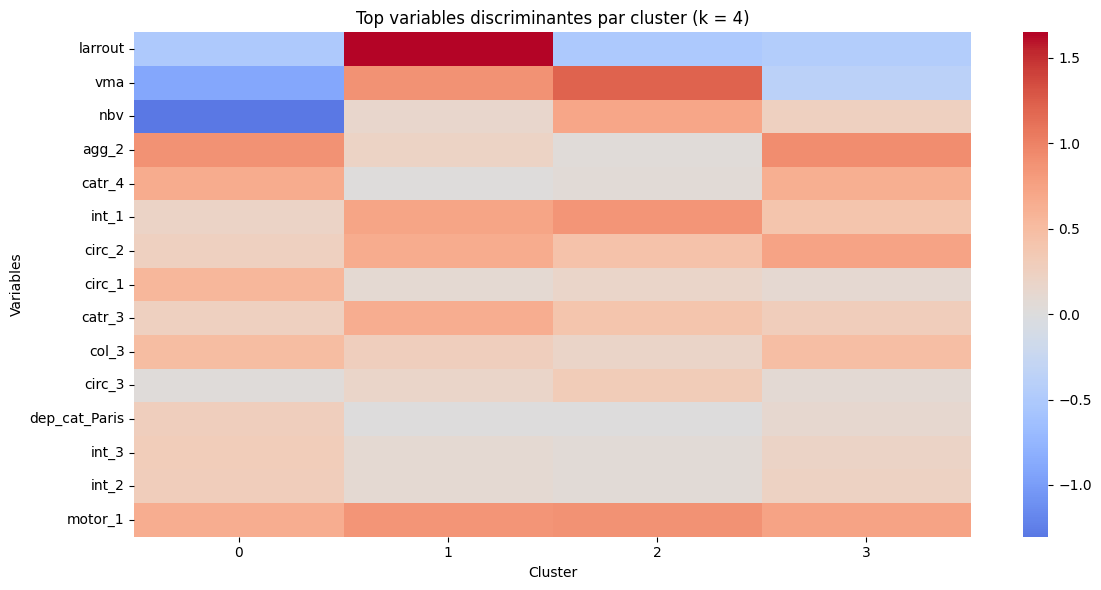

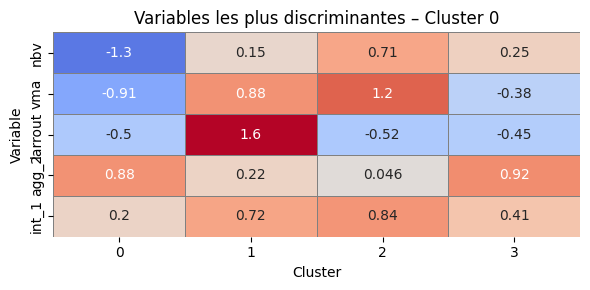

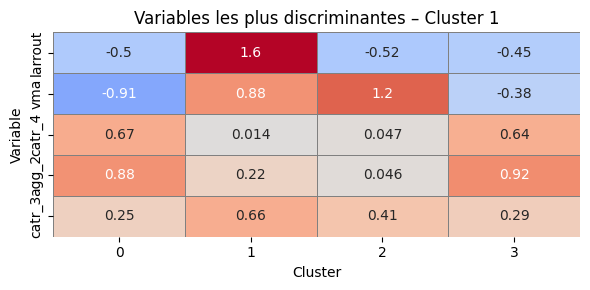

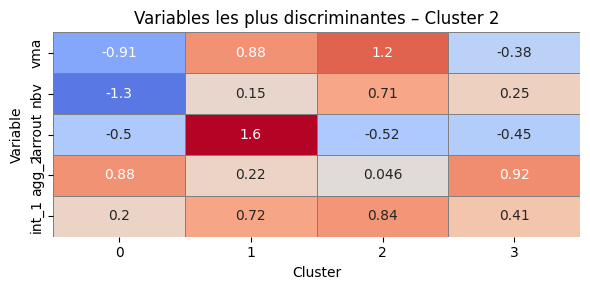

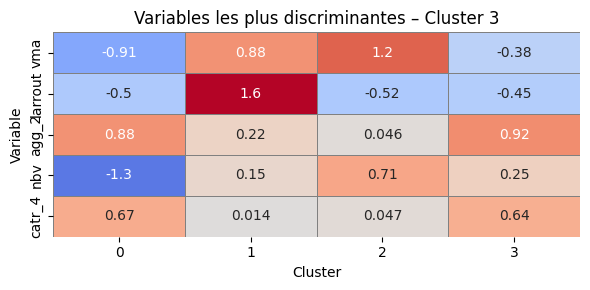

In [6]:
df_cluster = kmeans_clustering(df_cluster, 4)

#### Clustering sans les variables précédements les plus significatives des clusteurs (les numériques)

Cela va nous permettre d'observer des clusterings différents 

In [4]:
df_cluster_without_num = prepare_clustering_df(caract, lieux, vehicules, whithout_num = True)

print(f"Shape du dataset prêt pour clustering : {df_cluster_without_num.shape}")


Shape du dataset prêt pour clustering : (117674, 168)


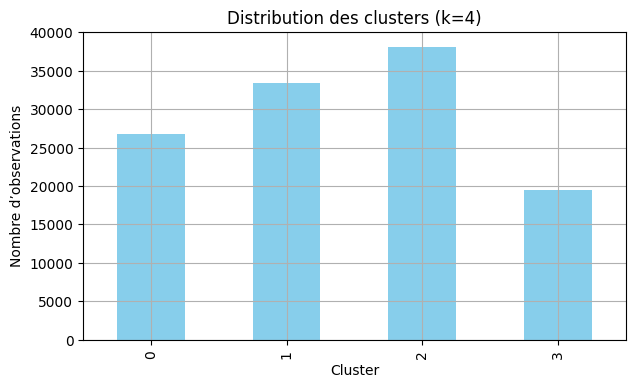

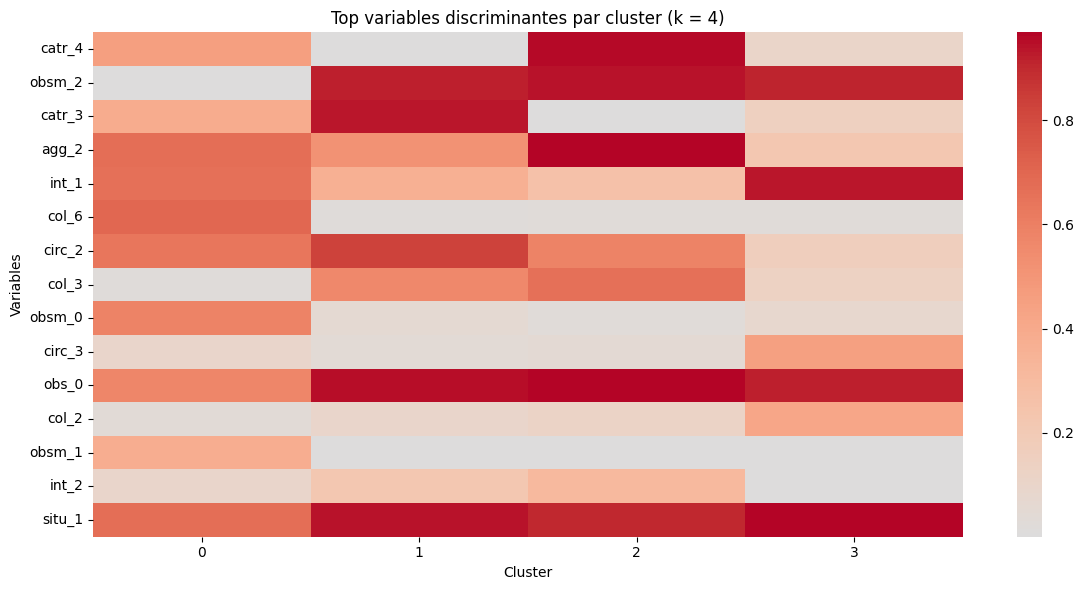

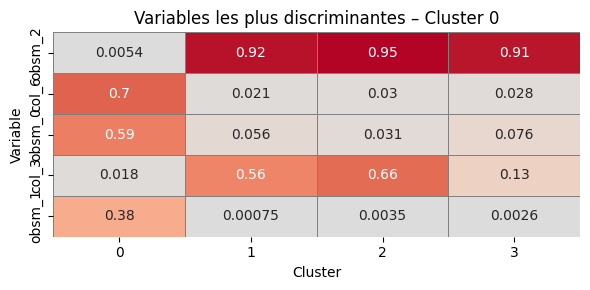

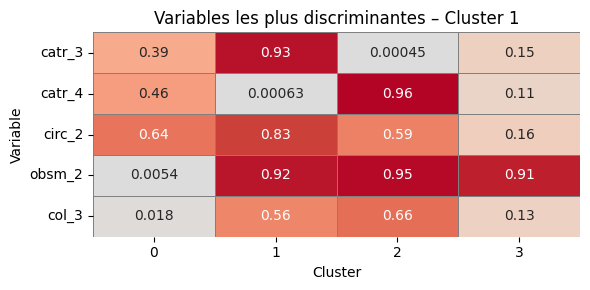

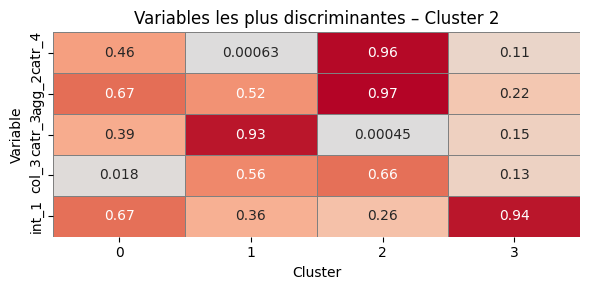

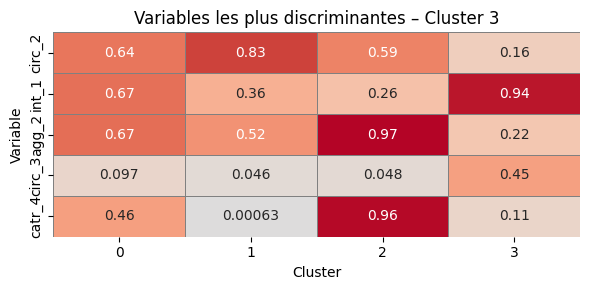

In [5]:
df_cluster_without_num = kmeans_clustering(df_cluster_without_num, 4)